In [1]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-81f8409f-ee30-1afb-bce6-6327efb77917)


In [2]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-15 09:33:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-15 09:33:06 (91.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import (unzip_data,
                             create_tensorboard_callback,
                             plot_loss_curves,
                             compare_historys)

In [4]:
! wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2023-04-15 09:33:10--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-04-15 09:33:10 (81.8 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualizing the text dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import preprocessing
import warnings
import random
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 0 -> not disaster
# 1 -> disaster

In [8]:
# shuffle train_df
train_df = train_df.sample(frac=1, random_state=42)

In [9]:
train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


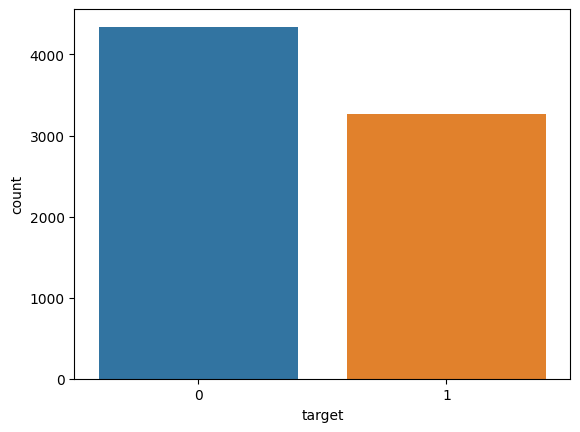

In [11]:
sns.countplot(x=train_df["target"])
plt.show()

In [12]:
len(train_df), len(test_df)

(7613, 3263)

# Splitting data into training and validation data

In [13]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].values,
                                                                           train_df["target"].values,
                                                                           test_size=0.1,
                                                                           random_state=42)

In [14]:
train_sentences.shape, train_labels.shape, val_sentences.shape, val_labels.shape

((6851,), (6851,), (762,), (762,))

In [15]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [16]:
val_sentences[:10], val_labels[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

# Converting text to numbers
#### Tokenization is Label Encoding, One-hot encoding
#### Embedding is Vector Representation (richer representation)

## Text Vectorization (Tokenization)

In [17]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
# use default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequences to be?
                                    )

In [19]:
# find average number of tokens (words) in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (how many words from a tweet does the model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# fit text vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [22]:
sample = "There is a fire at my college!"
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  74,    9,    3,   42,   17,   13, 3991,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [23]:
words_in_vocab = text_vectorizer.get_vocabulary()
print(len(words_in_vocab))

10000


In [24]:
words_in_vocab[:5]
# UNK is unknown

['', '[UNK]', 'the', 'a', 'in']

In [25]:
words_in_vocab[-5:]

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

## Embedding the tokenized vectors

In [26]:
embedding = tf.keras.layers.Embedding(
    input_dim=max_vocab_length, # set input shape
    output_dim=128, # output shape
    input_length=max_length # how long is each input 
)
embedding

In [27]:
x = random.choice(train_sentences)
print(f"Original tweet is: {x}")
embedded_x = embedding(text_vectorizer([x]))
print(f"Embedded tweet is: {embedded_x}")

Original tweet is: General News Û¢åÊ'Demolition of houses on waterways begins at Achimota Mile 7 ' via @233liveOnline. Full story at http://t.co/iO7kUUg1uq
Embedded tweet is: [[[-0.03155961 -0.02446561 -0.04186691 ... -0.04191905  0.01310707
    0.02063885]
  [-0.04421644  0.04871167 -0.00721221 ... -0.03802446  0.02788958
   -0.01456172]
  [ 0.00614891  0.02961382 -0.00692426 ...  0.04620856  0.01330345
   -0.01083063]
  ...
  [-0.03459951  0.04995555  0.02834817 ... -0.04578643 -0.01759278
   -0.02864643]
  [ 0.03114971  0.0090569   0.00390394 ... -0.00158805  0.00523566
   -0.02007685]
  [-0.01144799  0.01962795 -0.01729013 ... -0.04467435  0.01826077
    0.02352114]]]


In [28]:
embedded_x[0][0], train_sentences[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03155961, -0.02446561, -0.04186691, -0.02786195, -0.03231189,
         0.01379089, -0.02419016, -0.02125657, -0.00348126,  0.01657944,
         0.02264407,  0.01960628, -0.00766664,  0.03222047,  0.03278586,
        -0.01704503,  0.0234812 ,  0.03717731,  0.01781732,  0.00660317,
         0.00846884,  0.00719012,  0.01343535,  0.01552183,  0.01651666,
         0.04929638, -0.00200734, -0.01182164,  0.043521  ,  0.02111742,
         0.00522673, -0.02253541,  0.03818444, -0.01013726, -0.01409384,
        -0.02636106, -0.02762631, -0.00492806, -0.00018211,  0.03122151,
         0.00404168, -0.00372261, -0.01298939,  0.02229209,  0.01696973,
         0.03232825, -0.00514563,  0.02433058, -0.03590916, -0.02940483,
        -0.01209646,  0.01045988, -0.0312621 , -0.02024859, -0.0481028 ,
        -0.04914991,  0.0257845 ,  0.00413499,  0.03154203,  0.03274634,
         0.0158718 , -0.03280459,  0.02106925, -0.04414994,  0.0407129 ,
  

## Model 0: Naive Bayes with TF-IDF vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [30]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB()),
])

In [31]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [33]:
pred_labels = model_0.predict(val_sentences)
print(classification_report(val_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



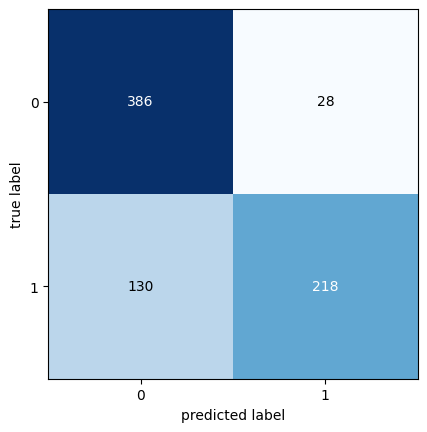

In [34]:
plot_confusion_matrix(confusion_matrix(val_labels, pred_labels))
plt.show()

## Model 1: ANN

In [35]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="input_layer"))
model_1.add(text_vectorizer) 
model_1.add(embedding)
model_1.add(tf.keras.layers.GlobalAveragePooling1D()) # acts kinda like a flatten layer but better
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer"))

In [36]:
model_1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

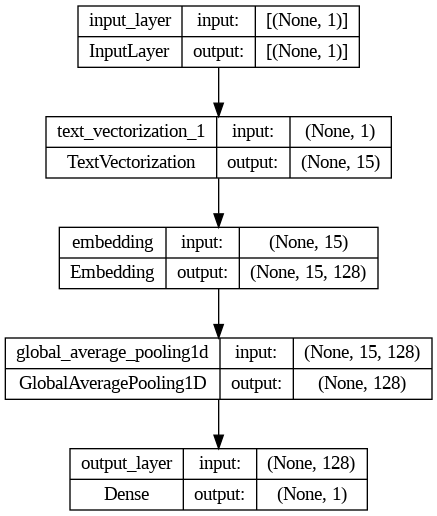

In [37]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [38]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              batch_size=32,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 37s 137ms/step - loss: 0.6128 - accuracy: 0.6841 - val_loss: 0.5381 - val_accuracy: 0.7585
Epoch 2/10
215/215 [==============================] - 2s 10ms/step - loss: 0.4425 - accuracy: 0.8171 - val_loss: 0.4771 - val_accuracy: 0.7795
Epoch 3/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3471 - accuracy: 0.8609 - val_loss: 0.4587 - val_accuracy: 0.7927
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2835 - accuracy: 0.8910 - val_loss: 0.4659 - val_accuracy: 0.7874
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2373 - accuracy: 0.9115 - val_loss: 0.4807 - val_accuracy: 0.7835
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.2004 - accuracy: 0.9275 - val_loss: 0.5018 - val_accuracy: 0.7808
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1723 - accuracy: 0.9385 - val_loss: 0.5296 - val_accuracy: 0.7769
E

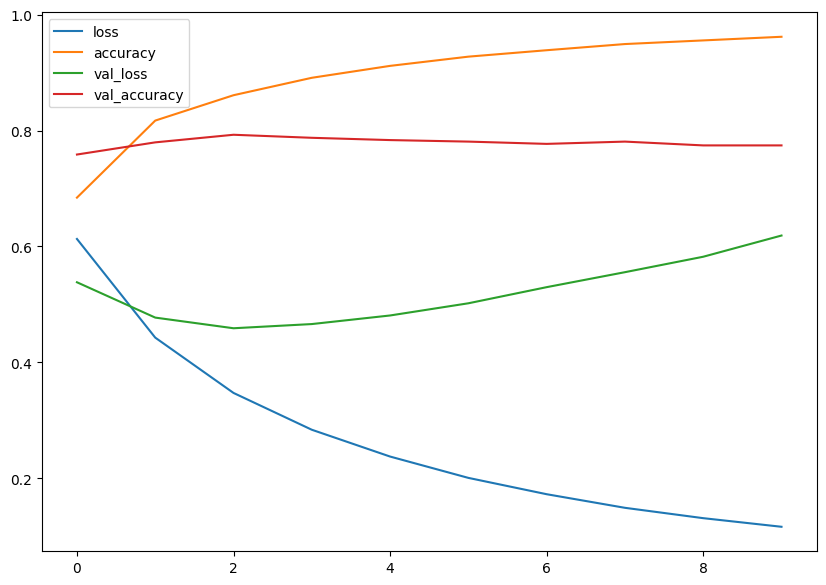

In [39]:
pd.DataFrame(model_1_history.history).plot(figsize=(10,7))
plt.show()

In [40]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.7743


[0.618717610836029, 0.7742782235145569]

In [41]:
pred_labels = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [42]:
pred_labels = tf.squeeze(tf.round(pred_labels))

In [43]:
print(classification_report(val_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       414
           1       0.79      0.70      0.74       348

    accuracy                           0.77       762
   macro avg       0.78      0.77      0.77       762
weighted avg       0.78      0.77      0.77       762



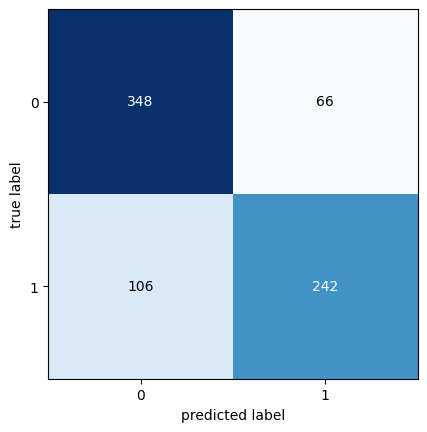

In [44]:
plot_confusion_matrix(confusion_matrix(val_labels, pred_labels))
plt.show()

In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [46]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]

In [47]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [48]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

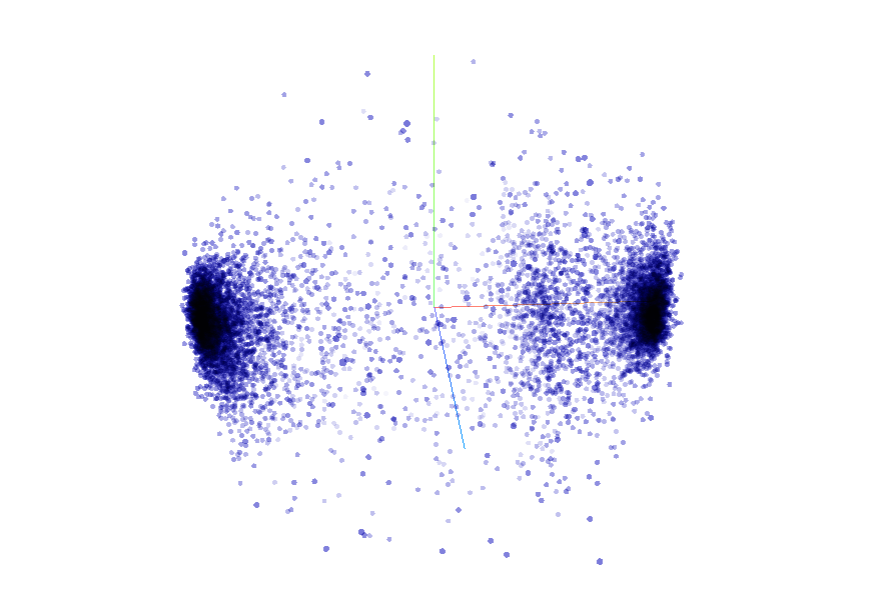

In [49]:
# use tf projector

## Model 2: RNN

Structure for RNN generally looks like this:
```
Input(text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)
```

In [50]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = tf.keras.layers.LSTM(units=64, activation="tanh", return_sequences=True)(x) # when stacking RNN cells set return_sequences=True
# print(x.shape)
x = tf.keras.layers.LSTM(units=64, activation="tanh")(x)
# print(x.shape)
x = tf.keras.layers.Dense(units=64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)  
model_2 = tf.keras.models.Model(inputs, outputs, name="model_2_LSTM")

In [51]:
model_2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

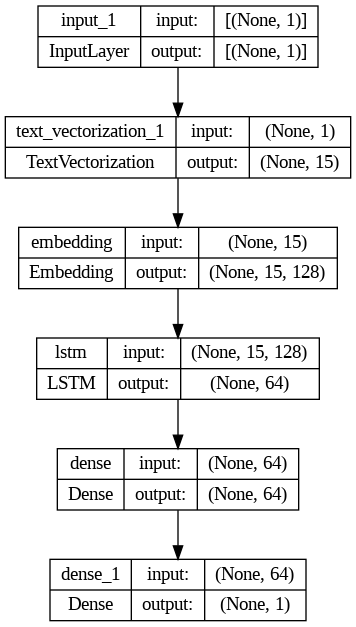

In [52]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

In [53]:
model_2_history = model_2.fit(x=train_sentences, 
                              y=train_labels,
                              batch_size=32,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 16s 56ms/step - loss: 0.1406 - accuracy: 0.9572 - val_loss: 0.7315 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0869 - accuracy: 0.9682 - val_loss: 0.8151 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0778 - accuracy: 0.9715 - val_loss: 0.9698 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0692 - accuracy: 0.9726 - val_loss: 1.0337 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0601 - accuracy: 0.9749 - val_loss: 1.1534 - val_accuracy: 0.7703


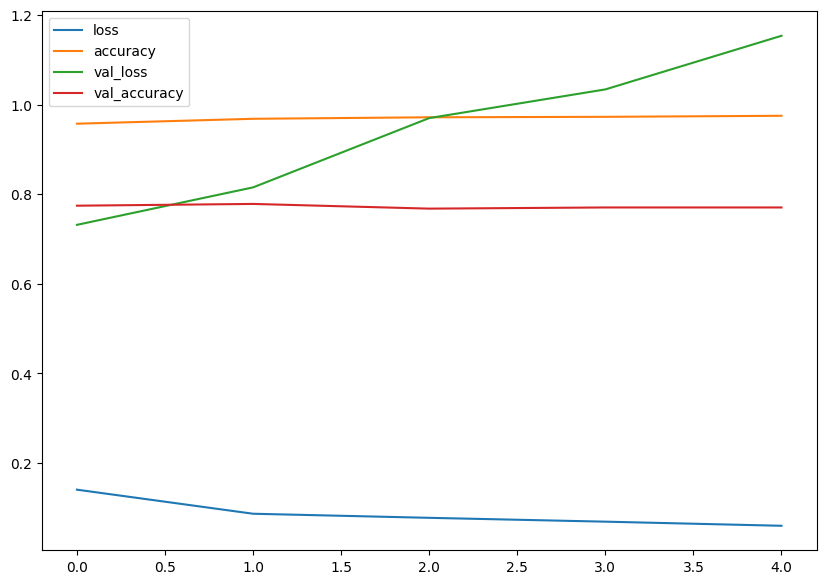

In [54]:
pd.DataFrame(model_2_history.history).plot(figsize=(10,7))
plt.show()

In [55]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.1534 - accuracy: 0.7703


[1.1534090042114258, 0.7703412175178528]

In [56]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[7.9362407e-02],
       [7.6417708e-01],
       [9.9993896e-01],
       [4.8267912e-02],
       [9.0061301e-05],
       [9.9905485e-01],
       [2.5069878e-01],
       [9.9998844e-01],
       [9.9998057e-01],
       [7.4828225e-01]], dtype=float32)

In [57]:
model_2_pred_probs = tf.squeeze(tf.round(model_2_pred_probs))
model_2_pred_probs

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [58]:
print(classification_report(val_labels, model_2_pred_probs))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       414
           1       0.78      0.69      0.73       348

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.77       762
weighted avg       0.77      0.77      0.77       762



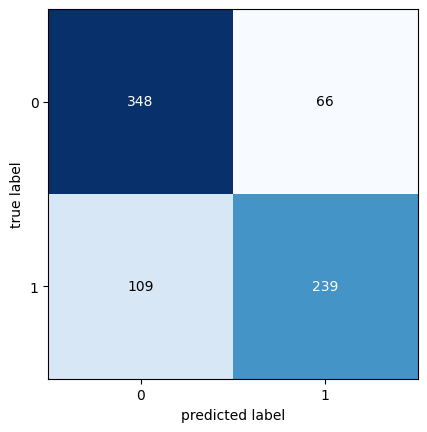

In [59]:
plot_confusion_matrix(confusion_matrix(val_labels, model_2_pred_probs))
plt.show()

## Model 3: GRU
GRU is same as LSTM cell but has lesser parameters

In [60]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(units=64, activation="tanh", return_sequences=True)(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) 
model_3 = tf.keras.models.Model(inputs, outputs, name="model_3_GRU")

In [61]:
model_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

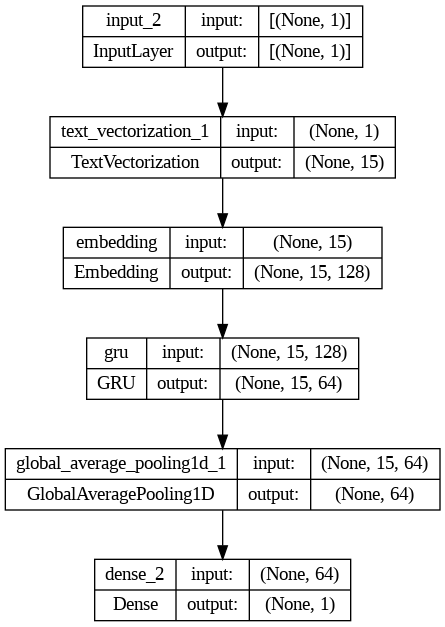

In [62]:
tf.keras.utils.plot_model(model_3, show_shapes=True)

In [63]:
model_3_history = model_3.fit(x=train_sentences, 
                              y=train_labels,
                              batch_size=32,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 54ms/step - loss: 0.1510 - accuracy: 0.9521 - val_loss: 0.7903 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0868 - accuracy: 0.9679 - val_loss: 0.8912 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0709 - accuracy: 0.9734 - val_loss: 0.8610 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0674 - accuracy: 0.9730 - val_loss: 0.9617 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0617 - accuracy: 0.9750 - val_loss: 0.9474 - val_accuracy: 0.7612


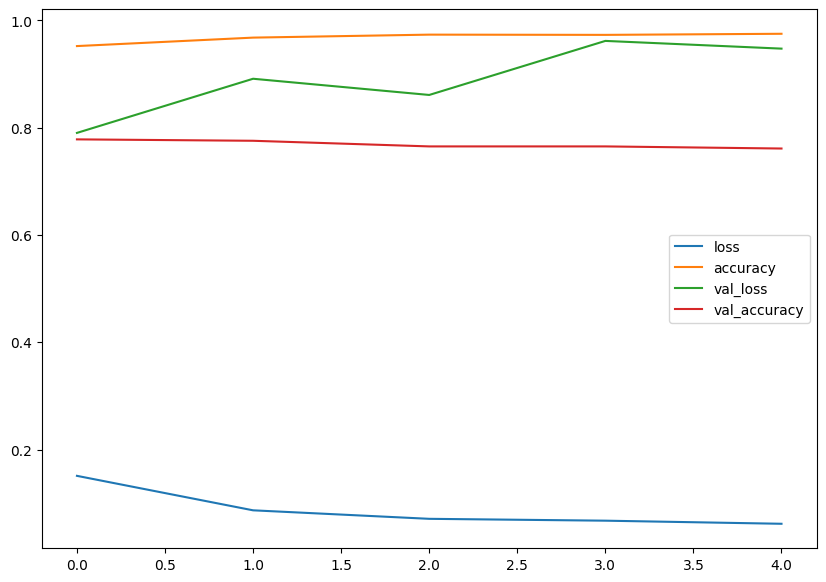

In [64]:
pd.DataFrame(model_3_history.history).plot(figsize=(10,7))
plt.show()

In [65]:
model_3.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.9474 - accuracy: 0.7612


[0.9473544359207153, 0.76115483045578]

In [66]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.26899704],
       [0.8577081 ],
       [0.9996013 ],
       [0.06814054],
       [0.00233689],
       [0.9870575 ],
       [0.9916579 ],
       [0.9999677 ],
       [0.9999913 ],
       [0.61983794]], dtype=float32)

In [67]:
model_3_pred_probs = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred_probs

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [68]:
print(classification_report(val_labels, model_3_pred_probs))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       414
           1       0.76      0.69      0.73       348

    accuracy                           0.76       762
   macro avg       0.76      0.76      0.76       762
weighted avg       0.76      0.76      0.76       762



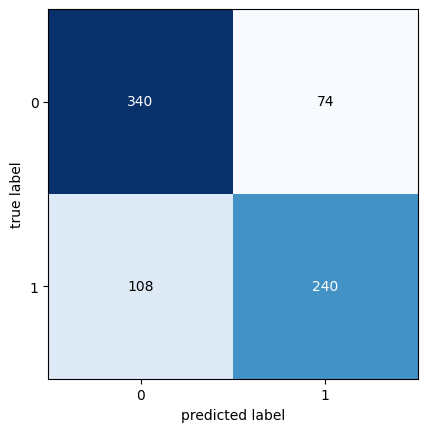

In [69]:
plot_confusion_matrix(confusion_matrix(val_labels, model_3_pred_probs))
plt.show()

## Model 4: Bidirectional LSTM
Normal RNN's go from left to right however, bidirectional RNN goes from right to left as well as left to right

In [70]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, activation="tanh", return_sequences=True), merge_mode="concat")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) 
model_4 = tf.keras.models.Model(inputs, outputs, name="model_4_BidirectionalLSTM")

In [71]:
model_4.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

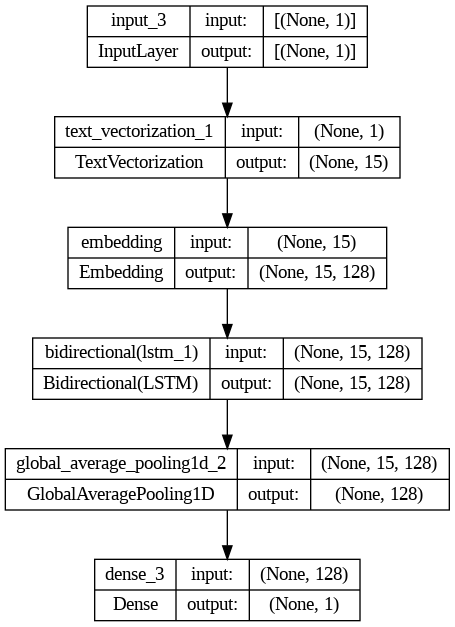

In [72]:
tf.keras.utils.plot_model(model_4, show_shapes=True)

In [73]:
model_4_history = model_4.fit(x=train_sentences, 
                              y=train_labels,
                              batch_size=32,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 17s 59ms/step - loss: 0.1149 - accuracy: 0.9688 - val_loss: 0.8807 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0583 - accuracy: 0.9775 - val_loss: 0.8572 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0511 - accuracy: 0.9788 - val_loss: 1.0399 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0474 - accuracy: 0.9794 - val_loss: 1.0626 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0452 - accuracy: 0.9797 - val_loss: 1.2061 - val_accuracy: 0.7612


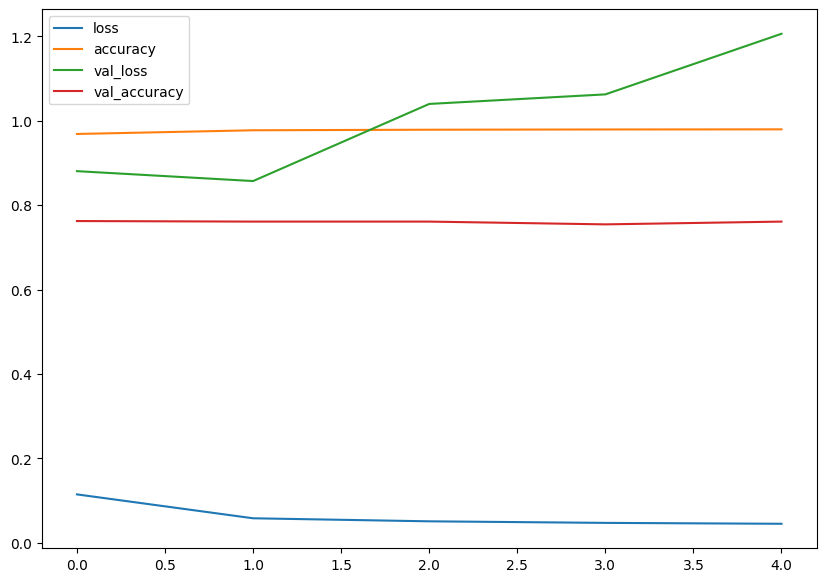

In [74]:
pd.DataFrame(model_4_history.history).plot(figsize=(10,7))
plt.show()

In [75]:
model_4.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.2061 - accuracy: 0.7612


[1.2061326503753662, 0.76115483045578]

In [76]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[2.8734105e-02],
       [8.3179283e-01],
       [9.9972552e-01],
       [1.2880270e-01],
       [8.8610628e-05],
       [9.7951651e-01],
       [8.5626042e-01],
       [9.9997294e-01],
       [9.9992120e-01],
       [9.7178549e-01]], dtype=float32)

In [77]:
model_4_pred_probs = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred_probs

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [78]:
print(classification_report(val_labels, model_4_pred_probs))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       414
           1       0.77      0.69      0.72       348

    accuracy                           0.76       762
   macro avg       0.76      0.76      0.76       762
weighted avg       0.76      0.76      0.76       762



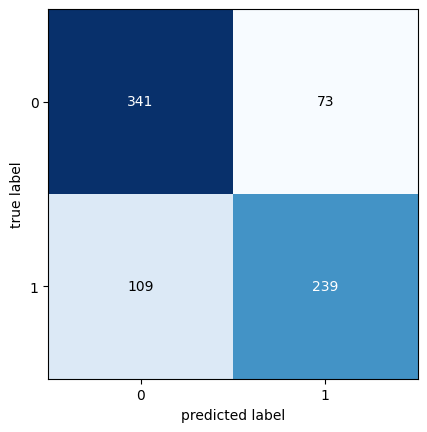

In [79]:
plot_confusion_matrix(confusion_matrix(val_labels, model_4_pred_probs))
plt.show()

# Model 5: Conv1D based model

In [80]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs) 
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.models.Model(inputs, outputs)

In [81]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

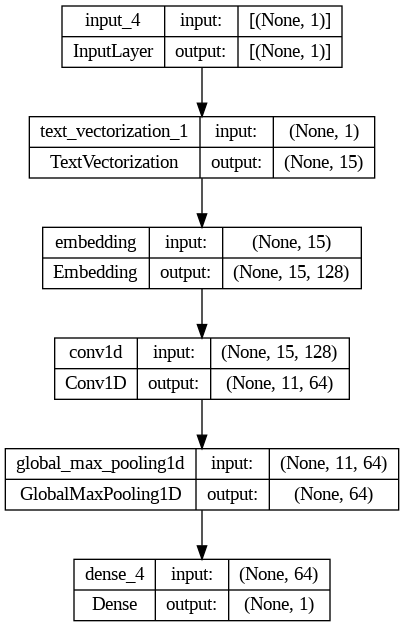

In [82]:
tf.keras.utils.plot_model(model_5, show_shapes=True)

In [83]:
model_5_history = model_5.fit(x=train_sentences, 
                              y=train_labels,
                              batch_size=32,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 17s 51ms/step - loss: 0.0973 - accuracy: 0.9689 - val_loss: 0.9977 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0632 - accuracy: 0.9756 - val_loss: 1.1406 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0535 - accuracy: 0.9769 - val_loss: 1.1882 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0512 - accuracy: 0.9788 - val_loss: 1.2602 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0482 - accuracy: 0.9790 - val_loss: 1.2881 - val_accuracy: 0.7520


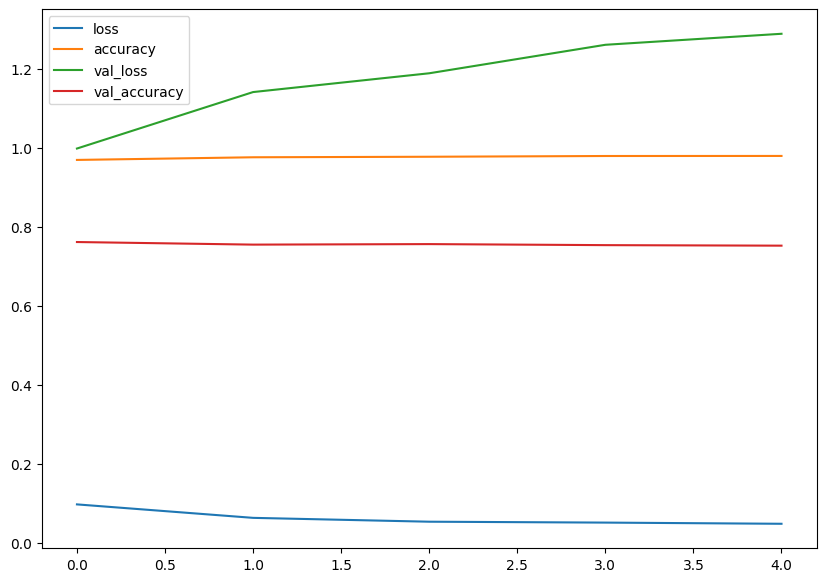

In [84]:
pd.DataFrame(model_5_history.history).plot(figsize=(10,7))
plt.show()

In [85]:
model_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.2881 - accuracy: 0.7520


[1.288114070892334, 0.751968502998352]

In [86]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[7.7948391e-01],
       [9.1417623e-01],
       [9.9994814e-01],
       [1.2444712e-01],
       [2.3207500e-07],
       [9.9771321e-01],
       [9.9584192e-01],
       [9.9999142e-01],
       [9.9999988e-01],
       [8.6222535e-01]], dtype=float32)

In [87]:
model_5_pred_probs = tf.round(model_5_pred_probs)
model_5_pred_probs = tf.squeeze(model_5_pred_probs)

In [88]:
print(classification_report(val_labels, model_5_pred_probs))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       414
           1       0.73      0.72      0.73       348

    accuracy                           0.75       762
   macro avg       0.75      0.75      0.75       762
weighted avg       0.75      0.75      0.75       762



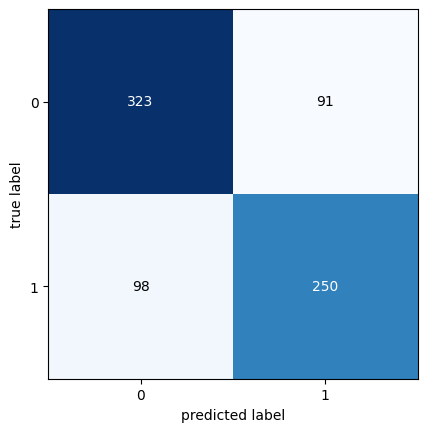

In [89]:
plot_confusion_matrix(confusion_matrix(val_labels, model_5_pred_probs))
plt.show()

# Model 6: USE (Universal Sentence Encoder)

In [90]:
import tensorflow_hub as hub

In [91]:
embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [92]:
sample_vector = embedder(["Turn this sentence into a vector"])
sample_vector

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.02056949, -0.02720173,  0.00767604,  0.02719261,  0.04697231,
         0.01142856,  0.02402321, -0.04243875,  0.0627771 ,  0.07164752,
        -0.01428704, -0.00430026,  0.0056483 , -0.05063857,  0.05621323,
        -0.06256434,  0.02367709, -0.03860343, -0.0085209 , -0.01351954,
         0.04457651,  0.04989747,  0.01021065,  0.04164714,  0.02054106,
         0.00401293,  0.04270825, -0.00618866, -0.04062634, -0.06311253,
        -0.00875587,  0.05009153, -0.02777747,  0.04237475, -0.07985201,
        -0.01335058,  0.02373641,  0.06022115, -0.05164439, -0.00776257,
         0.01552739,  0.01868461, -0.07079849, -0.02775765, -0.0220244 ,
         0.00210079, -0.00537142,  0.02067294,  0.00471063, -0.02332719,
         0.06725511,  0.08309614, -0.06595866,  0.01792469, -0.02040297,
        -0.04014338, -0.02831166,  0.0678748 , -0.03157162, -0.08296118,
        -0.05656064,  0.00444194,  0.00657261, -0.04774356,  0.00622168,
 

In [93]:
sample_vector.shape

TensorShape([1, 512])

In [94]:
# create keras layers
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[], # as variable length inputs can be taken by this layer
                                  dtype=tf.string,
                                  trainable=False,
                                  name="USE")

In [95]:
model_6 = tf.keras.models.Sequential()
model_6.add(sentence_encoder)
model_6.add(tf.keras.layers.Dense(128, activation="relu"))
model_6.add(tf.keras.layers.Dense(64, activation="relu"))
model_6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [96]:
model_6.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

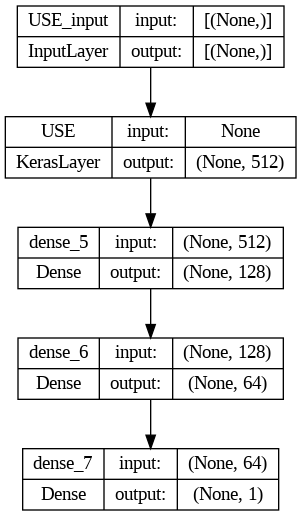

In [97]:
tf.keras.utils.plot_model(model_6, show_shapes=True)

In [98]:
model_6_history = model_6.fit(x=train_sentences, 
                              y=train_labels,
                              batch_size=32,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.4679 - accuracy: 0.7920 - val_loss: 0.4325 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3937 - accuracy: 0.8278 - val_loss: 0.4243 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3660 - accuracy: 0.8425 - val_loss: 0.4254 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3297 - accuracy: 0.8612 - val_loss: 0.4249 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2882 - accuracy: 0.8805 - val_loss: 0.4475 - val_accuracy: 0.8202


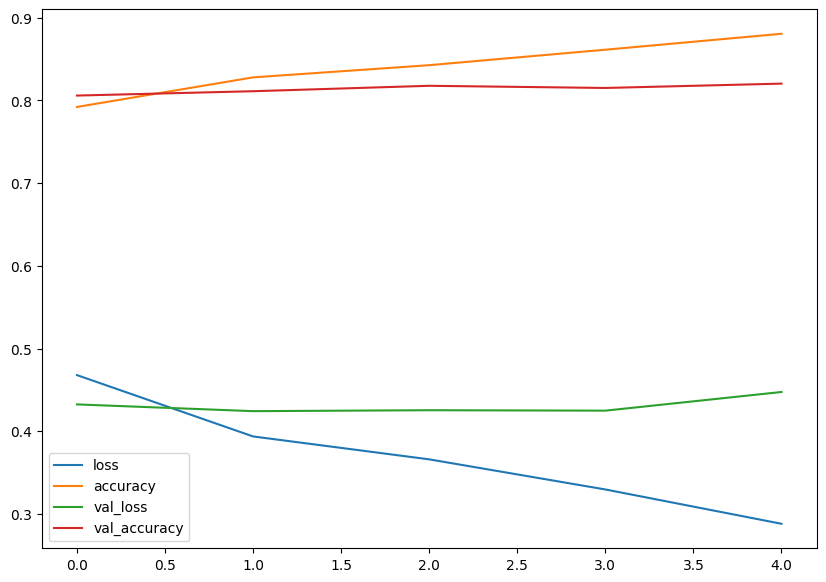

In [99]:
pd.DataFrame(model_6_history.history).plot(figsize=(10,7))
plt.show()

In [100]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 15ms/step - loss: 0.4475 - accuracy: 0.8202


[0.4474714398384094, 0.8202099800109863]

In [101]:
model_6_preds = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_preds))

24/24 [==============================] - 1s 9ms/step


In [102]:
print(classification_report(val_labels, model_6_preds))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       414
           1       0.88      0.70      0.78       348

    accuracy                           0.82       762
   macro avg       0.83      0.81      0.81       762
weighted avg       0.83      0.82      0.82       762



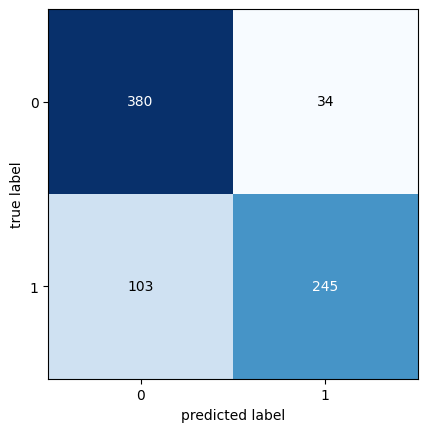

In [103]:
plot_confusion_matrix(confusion_matrix(val_labels, model_6_preds))
plt.show()

In [104]:
# saving and loading a hub based model

In [105]:
model_6.save("model_6.h5")

In [106]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer" : hub.KerasLayer})

In [107]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4475 - accuracy: 0.8202


[0.4474714398384094, 0.8202099800109863]